## Computational Homework 3

In this assignment, we work through the common distributions that come up when doing statistical tests for linear regression models. To illustrate the concepts, we will use synthetic data.

### Part 1: sampling distributions arising from normal random variables

In this part, you will be asked to plot densities of certain common distributions. To do this, we recommend using the implementations in `scipy.stats`. For example, the normal pdf can be accessed using:

```
from scipy.stats import norm
import numpy as np

xx = np.linspace(-2,2,100)
density_values = norm(loc=0, scale=1).pdf(xx)
```

See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) for more examples.

**Problem 1.** (normal sampling distribution) In this problem, we will investigate the sampling distribution of the sample mean of normal random variables and see that itself follows a normal distribution. To do this, perform the following simulation:

For each value of $n$ in $\{20, 50, 100, 500\}$, generate $n$ samples from the $N(1,1)$ distribution, and compute and store the sample mean:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i.
$$

Repeat this $B=10,000$ times, and plot a histogram of the computed means. You should end up with 4 histograms, one for each value of $n$. On top of each histogram, overlay a plot of the $N(1,1/n)$ distribution. _Note: make sure you use the argument `density=True` when plotting the histogram._ 

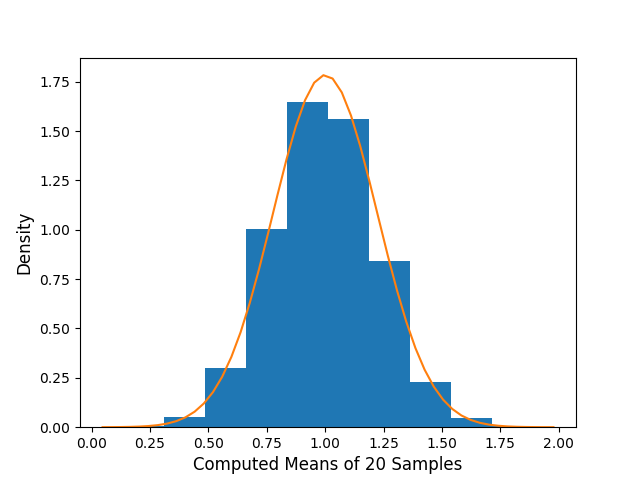

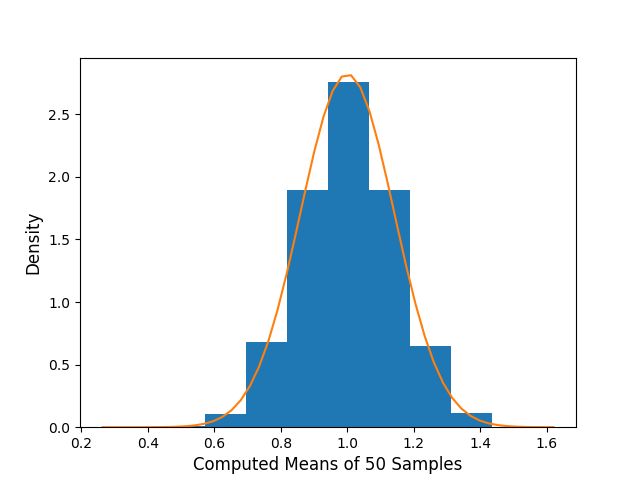

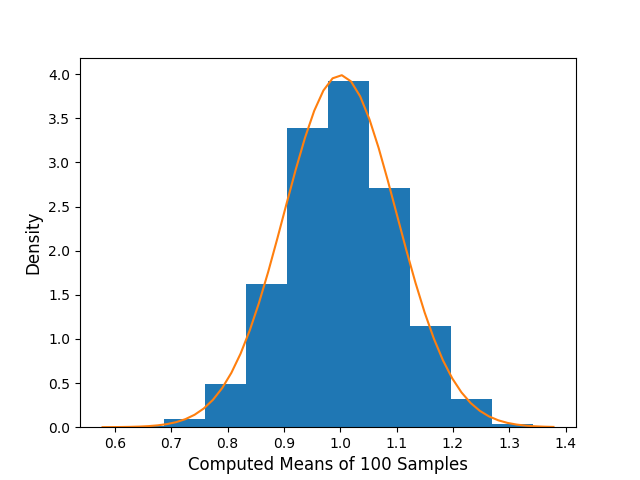

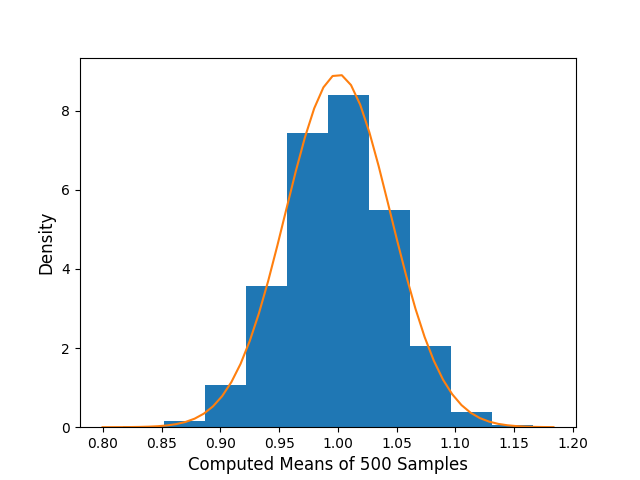

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

n = [20,50,100,500]

for i in n:
    xbars = []
    for B in range(10000):
        x = np.random.normal(1, 1, i)
        xbar = (1/i) * sum(x)
        xbars += [xbar]
    plt.hist(xbars, 
             density=True)
    xmin, xmax = plt.xlim()
    x_line = np.linspace(xmin, 
                         xmax, 
                         50)
    plt.plot(x_line, 
             norm.pdf(x_line, 
                      1,
                      np.sqrt(1/i)))
    plt.xlabel("Computed Means of " + str(i) + " Samples", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.show()

**Problem 2.** ($\chi^2$ sampling distribution) In this problem, we will investigate the sampling distribution of the sample variance, also from a normal distribution, and see that it follows a $\chi^2$ distribution. To do this, perform the following simulation:

For each value of $n$ in $\{20, 50, 100, 500\}$, generate $n$ samples from the $N(1,1)$ distribution, and compute and store the sample variance, given by:

$$
\hat{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2.
$$

Repeat this $B=10,000$ times, and plot a histogram of the values of $(n-1)\hat{\sigma}^2$ (i.e. take your estimates of the variance, and multiply them by $n-1$). You should end up with 4 histograms, one for each value of $n$. On top of each histogram, overlay a plot of the $\chi^2(n-1)$ distribution (i.e. the chi squared distribution with $n-1$ degrees of freedom). _Note: make sure you use the argument `density=True` when plotting the histogram._ 

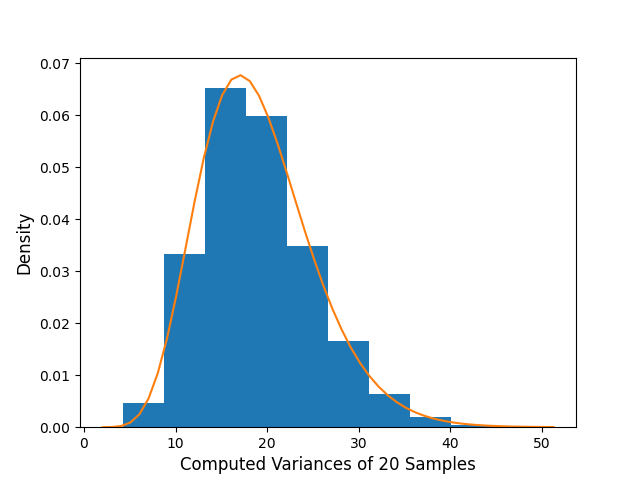

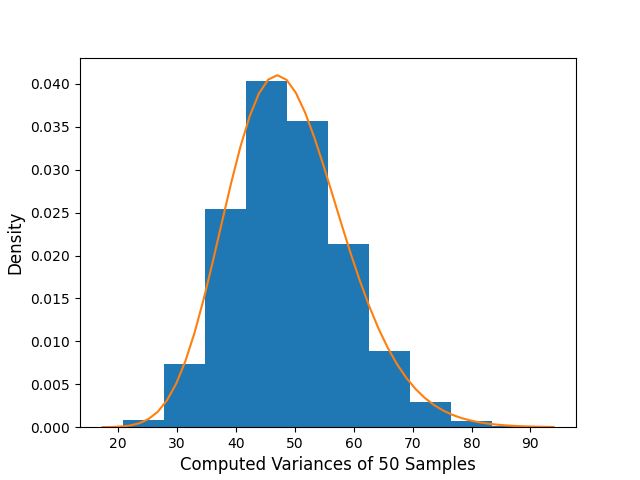

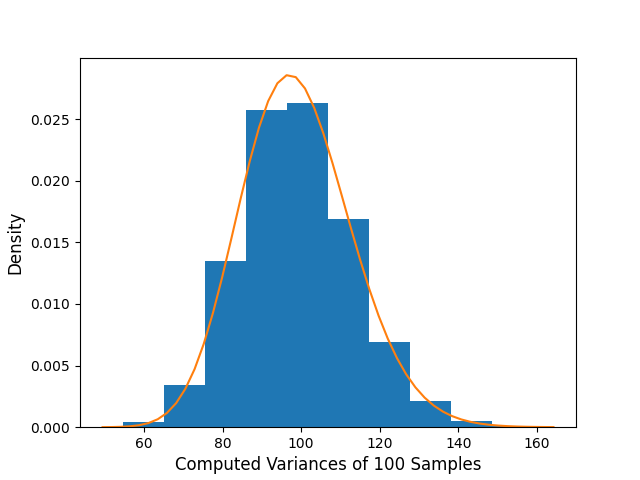

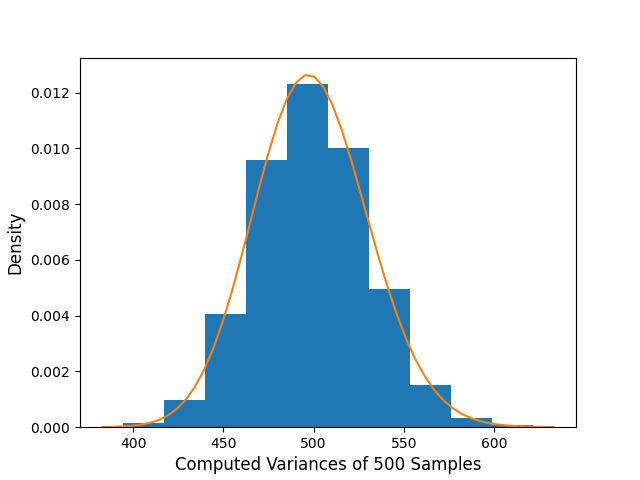

<Figure size 640x480 with 0 Axes>

In [3]:
from scipy.stats import chi2

n = [20,50,100,500]

for i in n:
    var_hats = []
    for B in range(10000):
        x = np.random.normal(1, 1, i)
        xbar = (1/i) * sum(x)
        var_hat = (1/(i-1)) * sum((x - xbar)**2)
        var_hats += [(i-1)*var_hat]
    plt.hist(var_hats, 
             density=True)
    xmin, xmax = plt.xlim()
    x_line = np.linspace(xmin, 
                         xmax, 
                         50)
    plt.plot(x_line, 
             chi2.pdf(x_line,
                      i-1))
    plt.xlabel("Computed Variances of " + str(i) + " Samples", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.show()

**Problem 3.** ($t$-distribution) In this distribution we will investigate the sampling distribution of the (empirically) standardized normal sample mean, and see that it follows a $t$ distribution. To do this, perform the following simulation:

For each value of $n$ in $\{20, 50, 100, 500\}$, generate $n$ samples from the $N(1,1)$ distribution, and compute and store the sample mean $\bar{x}$ (defined in problem 1), the sample variance (defined in problem 2) and the centered and normalized statistic

$$
\hat{T} = \frac{\bar{x}-1}{\hat{\sigma}/\sqrt{n}}.
$$

Repeat this $B=10,000$ times, and plot a histogram of the values of $\hat{T}$. You should end up with 4 histograms, one for each value of $n$. On top of each histogram, overlay a plot of the $t(n-1)$ distribution (i.e. the $t$ distribution with $n-1$ degrees of freedom). _Note: make sure you use the argument `density=True` when plotting the histogram._ 

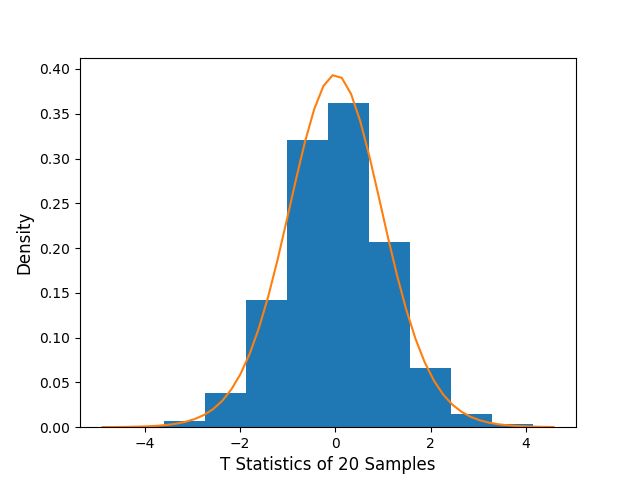

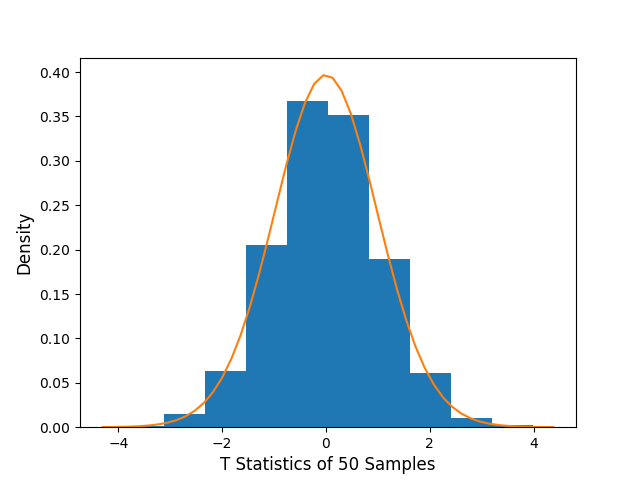

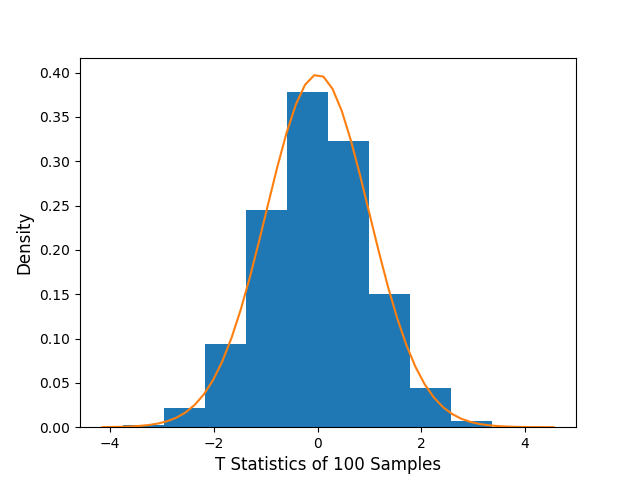

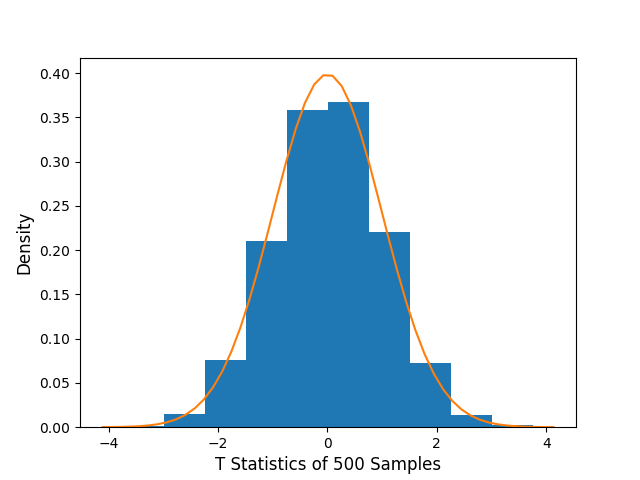

<Figure size 640x480 with 0 Axes>

In [4]:
from scipy.stats import t

n = [20,50,100,500]

for i in n:
    t_hats = []
    for B in range(10000):
        x = np.random.normal(1, 1, i)
        xbar = (1/i) * sum(x)
        var_hat = (1/(i-1)) * sum((x - xbar)**2)
        t_hat = (xbar-1) / (np.sqrt(var_hat)/np.sqrt(i))
        t_hats += [t_hat]
    plt.hist(t_hats, 
             density=True)
    xmin, xmax = plt.xlim()
    x_line = np.linspace(xmin, 
                         xmax, 
                         50)
    plt.plot(x_line, 
             t.pdf(x_line,
                   i-1))
    plt.xlabel("T Statistics of " + str(i) + " Samples", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.show()

### Part 2: regression with synthetic data

In this problem, we will see that for reasonable synthetic data, the distributions appearing in part 1 can all arise as part of a linear regression model. For the sake of this part, we will generate data as follows: first, we will create a dataset using the following procedure:

Take $X$ to be a fixed matrix of values on a grid (defined the following cell). We will then take $\beta_\star$ to be a vector of all ones. Finally, we will generate $y$ values as follows:

$$
y = X\beta_\star + \varepsilon 
$$

where $\varepsilon \sim N(0, 0.1 I)$. We give a single example of this process in the cell below.

In [5]:
import numpy as np
np.random.seed(0)

n = 100
p = 20
sigma2 = 0.1

beta_star = np.ones(p)
X = np.random.uniform(0,1, size=(n,p))
epsilon = np.random.normal(size=n)
y = np.dot(X, beta_star) + np.sqrt(sigma2)*epsilon

**Problem 1.** Perform the following simulation:

For $B=10,000$ trials, generate a new set of $y$ values by sampling a new set of error values $\varepsilon$ using the same method as given above. Note: you should use the same $X$ matrix and $\beta_\star$ value each time, *only* resampling the noise $\varepsilon$ at each step. For each trial, use the simulated data to compute and store the least squares estimates $\hat{\beta} = (X^\top X)^{-1}X^\top y$. At the end, plot a histogram of the values of $\hat{\beta}_j$ for some $j$ (you can pick any $1\leq j \leq 20$ that you want). Overlay a plot of the pdf of the $N(1, 0.1 (X^\top X)^{-1}_{jj})$ distribution (where $(X^\top X)^{-1}_{jj}$ is the $j$th diagonal of the matrix $X^\top X$). Try this same thing with a few values of $j$ -- how good are the fits of the normal distributions to the histograms?

From this problem, we should find that the distribution of the coefficients from linear regression follow a normal distribution. What component of the data generating process to you think leads to this? Does it matter if we, say, change $\beta_\star$ or use a different matrix $X$?

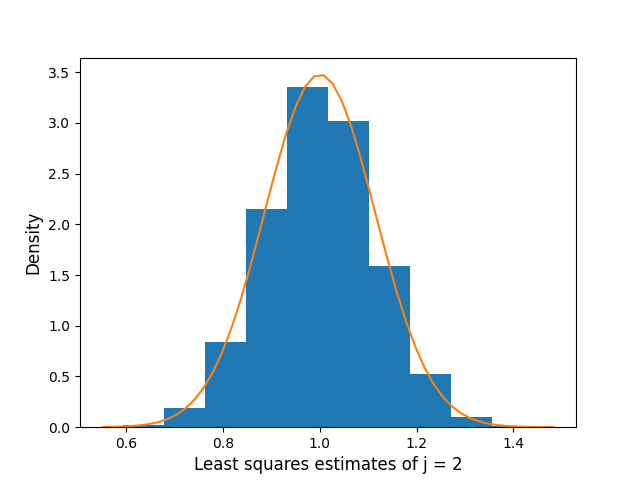

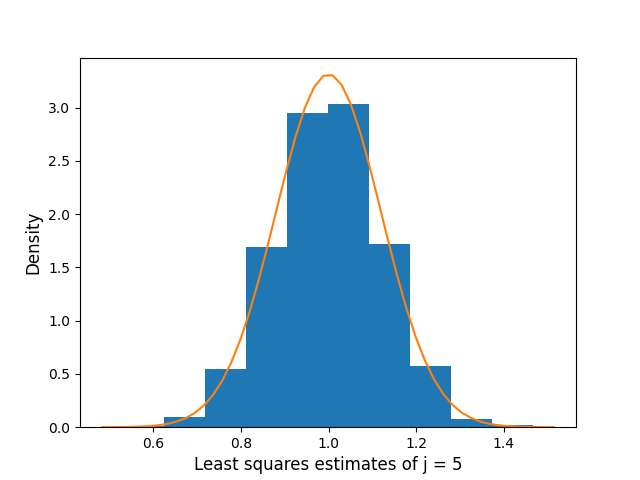

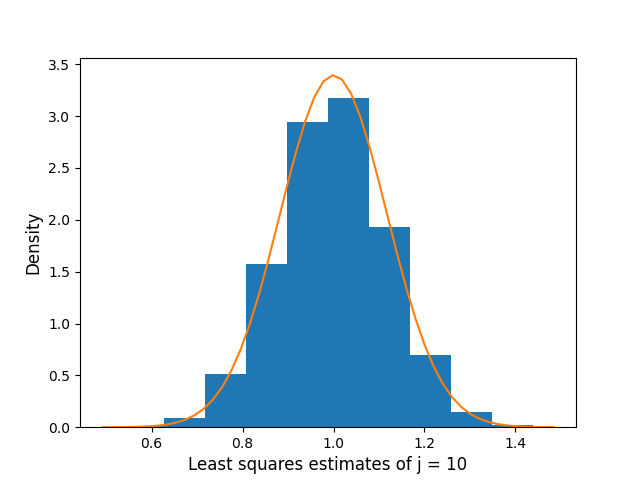

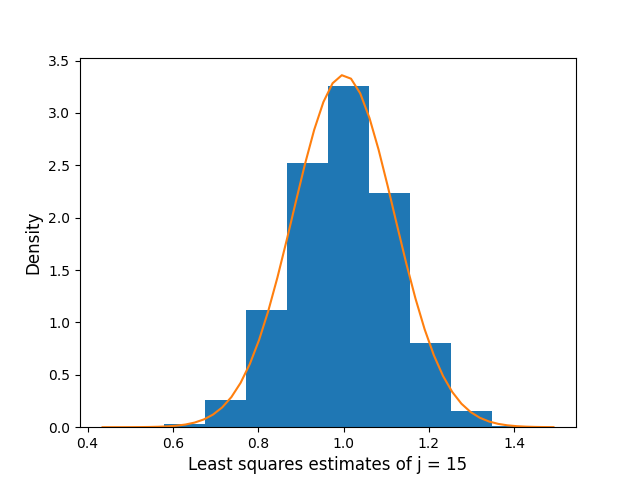

<Figure size 640x480 with 0 Axes>

In [6]:
for j in [2,5,10,15]:
    beta_hats = []
    for B in range(10000):
        epsilon = np.random.normal(size=n)
        y = np.dot(X, beta_star) + np.sqrt(sigma2)*epsilon
        beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        beta_hats += [beta_hat[j]]
    plt.hist(beta_hats, 
             density=True)
    xmin, xmax = plt.xlim()
    x_line = np.linspace(xmin, 
                         xmax, 
                         50)
    plt.plot(x_line, 
             norm.pdf(x_line, 
                      1,
                      np.sqrt(0.1 * np.linalg.inv(np.dot(X.T, X))[j][j])))
    plt.xlabel("Least squares estimates of j = " + str(j), fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.show()
        
# The fits of the normal distributions to the histograms are good. I think the component of the data generating process that leads to this is the normal distribution of epsilon. It does not matter if we change β⋆ or use a different matrix X.


**Problem 2.** For this problem, let's pretend we don't know the value of $\sigma^2$ for the errors. Instead, repeat the same simulation as in problem 1, but instead plugging in 

$$
\hat{\sigma}^2 = \frac{1}{n-p}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

for $\sigma^2$ in the normal distribution (where we previously had $0.1$). Then, at each iteration, compute and store

$$
\hat{T}= \frac{\hat{\beta}_j - 1}{\sqrt{\hat{\sigma}^2(X^\top X)^{-1}_{jj}}}
$$

and plot a histogram of these values. Overlay the pdf of the $t(n-p)$ distribution. 

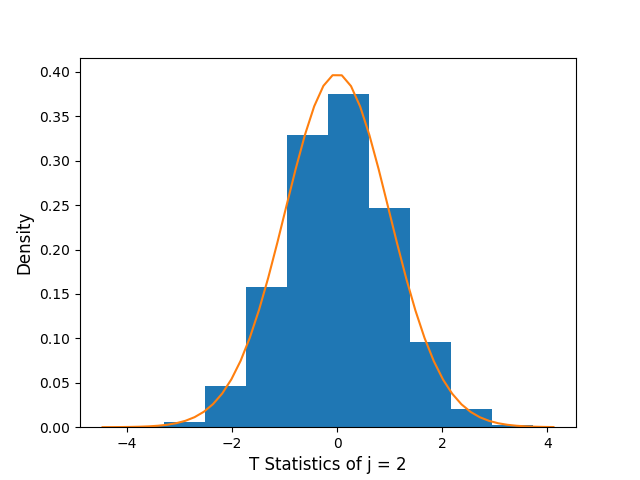

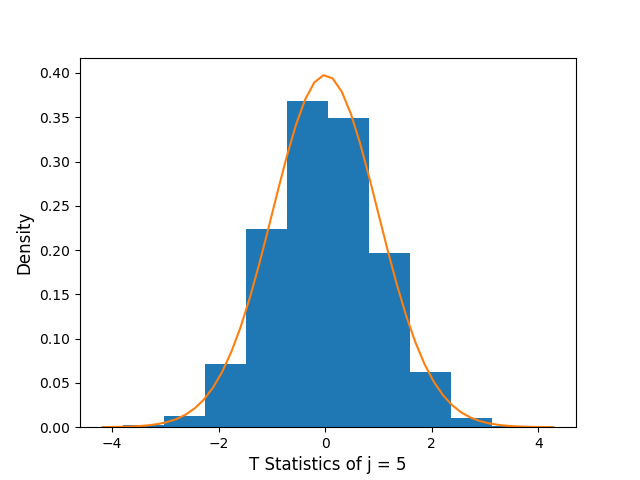

In [ ]:
for j in [2,5,10,15]:
    t_hats = []
    for i in range(10000):
        epsilon = np.random.normal(size = n)
        y = np.dot(X, beta_star) + np.sqrt(sigma2)*epsilon
        beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),(X.T)),y)
        y_hat = np.dot(X, beta_hat)
        var_hat = (1 / (n-p)) * sum((y - y_hat)**2)
        t_hat = (beta_hat[j] - 1)/ np.sqrt(var_hat * np.linalg.inv(np.dot(X.T, X))[j][j])
        t_hats += [t_hat]
    plt.hist(t_hats, 
             density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 50)
    plt.plot(x, 
             t.pdf(x, 
                   n-p))
    plt.xlabel("T Statistics of j = " + str(j), fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.show()